# DAS light transmission and Rayleigh backscatter

In [1]:
# Snell's law

import numpy as np


def snell(theta_inc, n1, n2):
    """
    Compute the refraction angle using Snell's Law.

    See https://en.wikipedia.org/wiki/Snell%27s_law

    Parameters
    ----------
    theta_inc : float
        Incident angle in radians.
    n1, n2 : float
        The refractive index of medium of origin and destination medium.

    Returns
    -------
    theta : float
        refraction angle

    Examples
    --------
    A ray enters an air--water boundary at pi/4 radians (45 degrees).
    Compute exit angle.

    >>> snell(np.pi/4, 1.00, 1.33)
    0.5605584137424605
    """
    return np.arcsin(n1 / n2 * np.sin(theta_inc))

In [21]:
%matplotlib notebook

#Constants assigned here

n_fiber = 1.55 #index of refraction of the fiber core
n_clad = 1.45 #index of refraction of the fiber cladding
core_top = 0.25 #location of the top of the fiber
core_bot = -0.25 #location of the bottom of the fiber
fiber_length = 2 #x length of fiber n which we are looking

#Generate random x and y positions within the fiber core to be used 
#for placement of the scattering points or fiber core inhomogeneities 

import random
x = []
y = []
for _ in range(100):
    x.append(random.uniform(0, fiber_length))
    y.append(random.uniform(core_bot+(0.1*core_top), core_top-(0.1*core_top)))
    

#Import needed packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import math


#Define the reflection point, or where we want to highlight the Rayleigh scattering
#and light relflection from a fiber core inhomogeneity.
 
refl_point1 = 1.3

# This function will be used to create the animation. The argument, t, is the iterable taken from the 'frames' argument
# in the FuncAnimation function below. The iterable t will step through all values along the x axis as defined by the argument
# given to the frames argument.
#     All the scattered light is defined outside the function and the values of the light ray position are assigned within it.

def reflection(t):
    length = 0.1 #the length of the line denoting the light
    
    #Light impulse
    t1 = np.arange(t-(length),t,0.001) #array with x values that have length defined by length and a location that start at the iterable
    y1 = 0 #the y value will remain 0 as it travels down cable
    line1.set_data(t1, y1) #set the values to be plotted for the light pulse.
    
    #Once the iterable is greater than the reflection point location, we create the light scattering.
    
    if t > refl_point1: #iterable (light pulse) is greater than (past the) reflection point
        step_back = t - refl_point1 #this tells us how far we are from the reflection point now
        start = t - (2*step_back) #we need to go back twice that distance to generate a backwards traveling scatter
        t_scatter = np.arange(start-(length),start,0.001) #now we can create an x value array for the backwards traveling light
        
        #NOTE: this way does not account for differences in x-position depending on the directionsality of the the scattered light
        # i.e. the light scattered at an angle with travel the same x-distance as the light scattered directly back even though the velocities should be the same.
        
        #First scatter: directly back from the scatter point
        y2 = 0
        line2.set_data(t_scatter, y2)
        
        #Second scatter: up and back at the off_back_angle 
        
        off_back_angle = 20 #this angle is within threshold for complete internal reflection
        
        y3 = (refl_point1 - t_scatter) * math.tan(math.radians(off_back_angle)) #y position calculated as y = x*tan(scatter angle)
        
  
        
        if y3[0] < core_top: #if the scattered light ray is within the core, follow the current trajectory
            
            line3.set_data(t_scatter, y3)
        
        if y3[-1] >= core_top: #if the scattered light ray has hit the core-cladding boundary
            y3 =  (t_scatter - refl_point1)* math.tan(math.radians(off_back_angle)) + 2*core_top #reflect the light back down into the core. Top of the core is the initial postion for the relflection
            line3.set_data(t_scatter, y3)
      
        
        #Third scatter: down (negative) and back at the off_back_angle
        
        off_back_angle = -20 #this angle is within threshold for complete internal reflection (angle from horizontal)
        
        y4 = (refl_point1 - t_scatter) * math.tan(math.radians(off_back_angle)) #backscattered light off of the reflection point
        
        if y4[0] > core_bot:
            line4.set_data(t_scatter, y4) #if we are within the fiber, continue its backscattered trajectory
        
        if y4[-1] <= core_bot:
            y4 = (t_scatter - refl_point1) * math.tan(math.radians(off_back_angle)) + 2*core_bot #if we are outside the cable, reflect it back into the cable
            line4.set_data(t_scatter, y4)
            
        #Light scattered and transmitted into the cladding
        
        off_back_angle = 30 #backscattered angle from horizontal
        incidence_angle = 90 - off_back_angle #angle of incidence with the fiber cladding from vertical
        
        y5 = (refl_point1 - t_scatter) * math.tan(math.radians(off_back_angle)) #backscattered light off of the reflection point
        
        if y5[0] < core_top:
            line5.set_data(t_scatter, y5) #if we are still in the fiber, continue trajectory
        
        if y5[-1] >= core_top:
            y5 =  - t_scatter / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) + core_top + (refl_point1 - (core_top / math.tan(np.radians(off_back_angle)))) / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) #if we hit the cladding, deflect light into cladding according to snell's law
            line5.set_data(t_scatter, y5)
        
        off_back_angle = -30 #backscattered angle from horizontal
        incidence_angle = 90 - off_back_angle #angle of incidence with the fiber cladding from vertical
        
        y6 = (refl_point1 - t_scatter) * math.tan(math.radians(off_back_angle))
        
        if y6[0] > core_bot:
            line6.set_data(t_scatter, y6) #if we are still in the fiber, continue trajectory
        
        if y6[-1] <= core_bot:
            y6 =  t_scatter / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) + core_bot - (refl_point1 - (core_bot / math.tan(np.radians(off_back_angle)))) / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) #if we hit the cladding, deflect light into cladding according to snell's law
            line6.set_data(t_scatter, y6)
            
        
    return line1, line2, line3, line4, line5, line6

#Create the figure and set the extents
fig, ax = plt.subplots()

ax.set_xlim([0, fiber_length])
ax.set_ylim([-1.22, 1.22])


# Create a Rectangle patch for the core
core = matplotlib.patches.Rectangle((0, core_bot), fiber_length, (np.abs(core_bot)+np.abs(core_top)), linewidth=1, edgecolor='black', facecolor='lightgrey', zorder=0, label='Fiber Core')

# Create a Rectangle patch for the bottom portion of the cladding
cladding_bottom = matplotlib.patches.Rectangle((0, core_bot*4), fiber_length, (np.abs(core_bot*4)-np.abs(core_top)), linewidth=1, edgecolor='black', facecolor='darkgrey', zorder=0, label='Fiber Cladding')

# Create a Rectangle patch for the top portion of the cladding
cladding_top = matplotlib.patches.Rectangle((0, core_top), fiber_length, (np.abs(core_bot*4)-np.abs(core_top)), linewidth=1, edgecolor='black', facecolor='darkgrey', zorder=0)


#plotting the transmitted and scattered light pulses
line6, = ax.plot([], [], lw=2, color = 'green')
line5, = ax.plot([], [], lw=2, color = 'green')
line4, = ax.plot([], [], lw=2, color = 'green')
line3, = ax.plot([], [], lw=2, color = 'green')
line2, = ax.plot([], [], lw=2, color = 'green', label = 'Rayleigh Backscattered Light')
line1, = ax.plot([], [], lw=2, color = 'steelblue', label = 'Light Pulse')



#Plot the locations of the randomly distributed scattering points
ax.scatter(x, y, color = 'mistyrose', lw = 0.3)


#Plot the location of the highlighted scattering point
ax.scatter(refl_point1, 0, color = 'red', lw = 0.3, label='Scattering Point')



plt.xlabel('Distance Along Fiber')

# Add the patch to the plot
ax.add_patch(core)
ax.add_patch(cladding_bottom)
ax.add_patch(cladding_top)

plt.legend()

# Creating the Animation object
line1_ani = animation.FuncAnimation(fig, reflection, frames=np.arange(0,2*refl_point1,0.01), fargs=(), interval=1, blit=False, repeat=True)

#line1_ani.save('WaveScatter1.gif', writer='imagemagick', fps=60)


plt.show()

<IPython.core.display.Javascript object>

In [3]:
%matplotlib notebook

n_fiber = 1.55
n_clad = 1.45
core_top = 0.25
core_bot = -0.25

import random
x2 = []
y2 = []
for _ in range(10):
    x2.append(random.uniform(0, 0.2))
    y2.append(random.uniform(core_bot+(0.1*core_top), core_top-(0.1*core_top)))



import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import math


 
refl_point2 = 1.5

strain = refl_point2 - refl_point1

x_strained = np.asarray(x)+strain

def reflection(t):
    length = 0.1
    t1 = np.arange(t-(length),t,0.001)
    y1 = 0
    line1.set_data(t1, y1)
    
    if t > refl_point2:
        step_back = t - refl_point2
        start = t - (2*step_back)
        t_scatter = np.arange(start-(length),start,0.001) #now we can create an x value array for the backwards traveling light
        
        #First scatter
        y2 = 0
        line2.set_data(t_scatter, y2)
        line2_phase.set_data(t_scatter[-15:], y2)
        
        #Second scatter
        off_back_angle = 20
        

        y3 = ((refl_point2 - t_scatter) * math.tan(math.radians(off_back_angle)))
        
  
        if y3[0] < core_top:
            line3.set_data(t_scatter, y3)
            line3_phase.set_data(t_scatter[-15:], y3[-15:])
        
        if y3[-1] >= core_top:
            y3 =  (t_scatter - refl_point2)* math.tan(math.radians(off_back_angle)) + 2*core_top #reflect the light back down into the core. Top of the core is the initial postion for the relflection
            line3.set_data(t_scatter, y3)
            line3_phase.set_data(t_scatter[-15:], y3[-15:])
      
        
        #Third scatter
        off_back_angle = -20
        
        y4 = ((refl_point2 - t_scatter) * math.tan(math.radians(off_back_angle)))
        
        if y4[0] > core_bot:
            line4.set_data(t_scatter, y4)
            line4_phase.set_data(t_scatter[-15:], y4[-15:])
        
        if y4[-1] <= core_bot:
            y4 = (t_scatter - refl_point2) * math.tan(math.radians(off_back_angle)) + 2*core_bot
            line4.set_data(t_scatter, y4)
            line4_phase.set_data(t_scatter[-15:], y4[-15:])
            
        #Light scattered and transmitted into the cladding
        off_back_angle = 30
        incidence_angle = 90 - off_back_angle
        
        y5 = ((refl_point2 - t_scatter) * math.tan(math.radians(off_back_angle)))
        
        line5_phase.set_data(t_scatter[-15:], y5[-15:])
        
        if y5[0] < core_top:
            line5.set_data(t_scatter, y5)
            line5_phase.set_data(t_scatter[-15:], y5[-15:])
            
        if y5[-1] >= core_top:
            y5 =  - t_scatter / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) + core_top + (refl_point2 - (core_top / math.tan(np.radians(off_back_angle)))) / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad))
            line5.set_data(t_scatter, y5)
            line5_phase.set_data(t_scatter[-15:], y5[-15:])
        
        off_back_angle = -30
        incidence_angle = 90 - off_back_angle
        
        y6 = ((refl_point2 - t_scatter) * math.tan(math.radians(off_back_angle)))
        
        if y6[0] > core_bot:
            line6.set_data(t_scatter, y6)
            line6_phase.set_data(t_scatter[-15:], y6[-15:])
        
        if y6[-1] <= core_bot:
            y6 =  t_scatter / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) + core_bot - (refl_point2 - (core_bot / math.tan(np.radians(off_back_angle)))) / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad))
            line6.set_data(t_scatter, y6)
            line6_phase.set_data(t_scatter[-15:], y6[-15:])
        
    return line1, line2, line3, line4, line5, line6

fig, ax = plt.subplots()

ax.set_xlim([0, 2])
ax.set_ylim([-1.22, 1.22])


# Create a Rectangle patch
core = matplotlib.patches.Rectangle((0, core_bot), 2, (np.abs(core_bot)+np.abs(core_top)), linewidth=1, edgecolor='black', facecolor='lightgrey', zorder=0, label='Fiber Core')
cladding_bottom = matplotlib.patches.Rectangle((0, core_bot*4), 2, (np.abs(core_bot*4)-np.abs(core_top)), linewidth=1, edgecolor='black', facecolor='darkgrey', zorder=0, label='Fiber Cladding')
cladding_top = matplotlib.patches.Rectangle((0, core_top), 2, (np.abs(core_bot*4)-np.abs(core_top)), linewidth=1, edgecolor='black', facecolor='darkgrey', zorder=0)
# Add the patch to the Axes


line6, = plt.plot([], [], lw=2, color = 'green')
line5, = plt.plot([], [], lw=2, color = 'green')
line4, = plt.plot([], [], lw=2, color = 'green')
line3, = plt.plot([], [], lw=2, color = 'green')
line2, = plt.plot([], [], lw=2, color = 'green', label = 'Rayleigh Backscattered Light')
line1, = plt.plot([], [], lw=2, color = 'steelblue', label = 'Light Pulse')

#phase shifted
line5_phase, = plt.plot([], [], lw=2, color = 'red')
line6_phase, = plt.plot([], [], lw=2, color = 'red')
line4_phase, = plt.plot([], [], lw=2, color = 'red')
line3_phase, = plt.plot([], [], lw=2, color = 'red')
line2_phase, = plt.plot([], [], lw=2, color = 'red', label = 'Phase Change')

ax.scatter(x_strained, y, color = 'mistyrose', lw = 0.3)
ax.scatter(x2, y2, color = 'mistyrose', lw = 0.3)


plt.scatter(refl_point2, 0, color = 'red', lw = 0.3, label='Scattering Point')


#plt.plot([0,100],[0.75,-0.75], color = 'lightgrey', lw=5)
#plt.plot([0,100],[-0.75,-0.75], color = 'black', lw=5, label='Fiber Core')

#plt.plot([refl_point, refl_point],[0.75,-0.75], color = 'black', ls = '--')

plt.xlabel('Distance Along Fiber')

ax.add_patch(core)
ax.add_patch(cladding_bottom)
ax.add_patch(cladding_top)

ax.annotate('Elastic Strain', (refl_point1,0),(refl_point1,-0.2))
plt.arrow(refl_point1,0, strain*0.7,0, head_width = 0.03)
plt.legend()

# Creating the Animation object
line1_ani = animation.FuncAnimation(fig, reflection, frames=np.arange(0,2*refl_point2,0.01), fargs=(), interval=1, blit=False, repeat=True)
#line1_ani.save('WaveScatter2.gif', writer='imagemagick', fps=60)


plt.show()

<IPython.core.display.Javascript object>

# Stacking the animation to better show phase change from strain

<IPython.core.display.Javascript object>


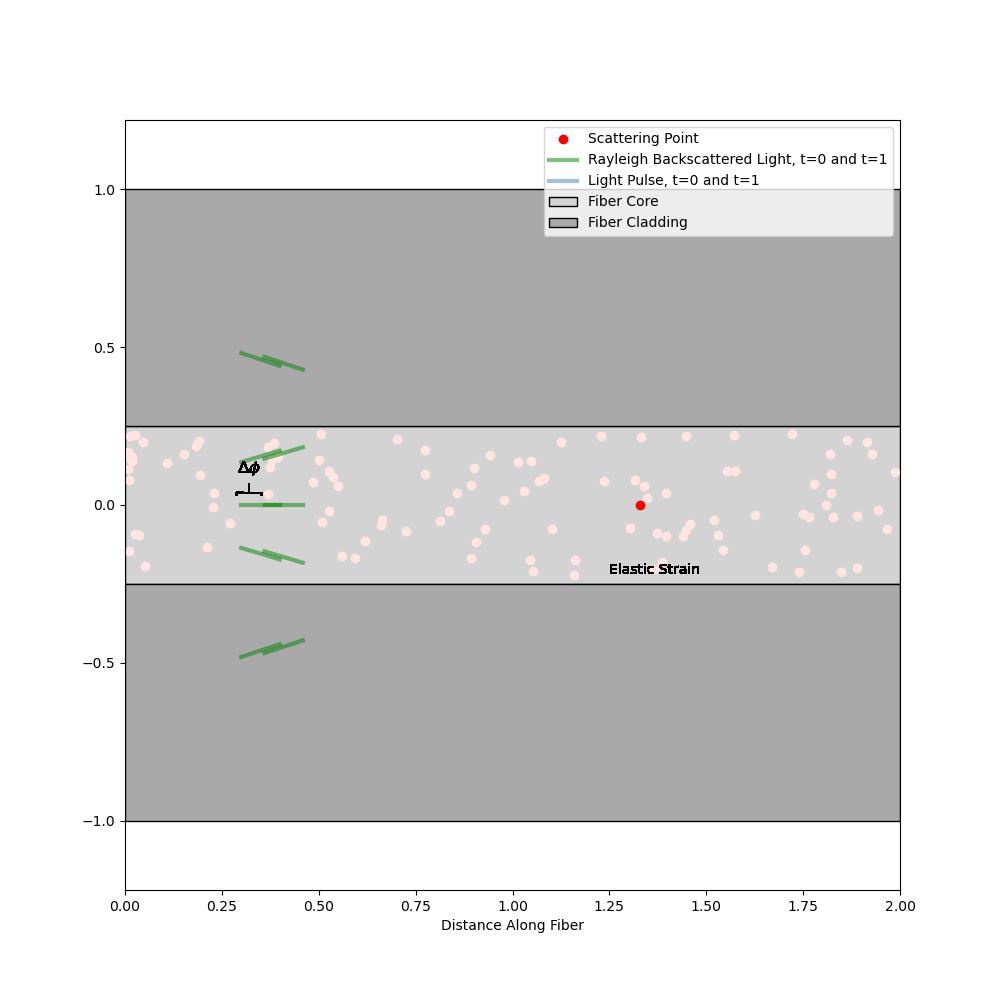

MovieWriter imagemagick unavailable; using Pillow instead.


In [22]:
%matplotlib notebook

#Import needed packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import math
import random
import time


#Constants assigned here

n_fiber = 1.55 #index of refraction of the fiber core
n_clad = 1.45 #index of refraction of the fiber cladding
core_top = 0.25 #location of the top of the fiber
core_bot = -0.25 #location of the bottom of the fiber
fiber_length = 2 #x length of fiber n which we are looking



#Define the reflection point, or where we want to highlight the Rayleigh scattering
#and light relflection from a fiber core inhomogeneity.

refl_point1 = 1.3
refl_point2 = 1.33

strain = refl_point2 - refl_point1


#Create the frames needed for creating the animation. Repeating values at the end to get
#pause effect we want for including annotations

frames = list(np.arange(0, 1.7*refl_point2 ,0.1))
frames += 50*[frames[-1]]


#Generate random x and y positions within the fiber core to be used 
#for placement of the scattering points or fiber core inhomogeneities 


x = []
y = []
for _ in range(100):
    x.append(random.uniform(0, fiber_length))
    y.append(random.uniform(core_bot+(0.1*core_top), core_top-(0.1*core_top)))

    

x_more = []
y_more = []
for _ in range(10):
    x_more.append(random.uniform(0, strain))
    y_more.append(random.uniform(core_bot+(0.1*core_top), core_top-(0.1*core_top)))
    





# This function will be used to create the animation. The argument, t, is the iterable taken from the 'frames' argument
# in the FuncAnimation function below. The iterable t will step through all values along the x axis as defined by the argument
# given to the frames argument.
#     All the scattered light is defined outside the function and the values of the light ray position are assigned within it.

def reflection(t):
    length = 0.1 #the length of the line denoting the light
    
    #Light impulse
    #First light pulse
    t1 = np.arange(t-(length),t,0.001) #array with x values that have length defined by length and a location that start at the iterable
    y1 = 0 #the y value will remain 0 as it travels down cable
    line1.set_data(t1, y1) #set the values to be plotted for the light pulse.
    
    #Second light pulse
    delay_tip = 0.3*length
    delay_tail = 1.3*length
    #t_2nd_pulse = np.arange(t- delay_tail, t - delay_tip, 0.001) # delay the second pulse
    t_2nd_pulse = np.arange(t- length, t , 0.001) #don't delay the second pulse, stack them so we can more accurately describe the phase shift
    y_2nd_pulse = 0 #Second light transimission along x axis
    
    second_pulse.set_data(t_2nd_pulse, y_2nd_pulse) #set values of the second light pulse
    
    if t == frames[-1]:

        #plt.annotate('$\Delta \phi$', (0.15,0), fontsize=12)
        plt.annotate("$\Delta \phi$",
            xy=(0.32, 0.03), xycoords='data',
            xytext=(0.29, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="-[", mutation_scale=9),
            size = 12
            )

    
    if t < refl_point1:
        scattering_point.set_data(refl_point1, 0)
        scat_points.set_data(x, y)
        added_points.set_data([],[])
    
    if t >= refl_point1 + strain/1.5:
        
        #Plot the location of the highlighted scattering point
        
        scattering_point.set_data(refl_point2, 0)
        
        #Strain the cable and move the scattering points accordingly
        x_strained = np.asarray(x)+strain
        
        scat_points.set_data(x_strained, y)
        
        #add aditional points to the front to compensate for the strain
        added_points.set_data(x_more, y_more)
        
        ann = plt.annotate('Elastic Strain', (refl_point1-0.05,-0.22))
        #arr = plt.arrow(refl_point1,-0.15, strain*0.6,0, head_width = 0.01, zorder=3)
        
    #Once the iterable is greater than the reflection point location, we create the light scattering.
    
    if t >= refl_point1: #iterable (light pulse) is greater than (past the) reflection point
        

        
        step_back1 = t - refl_point1 #this tells us how far we are from the reflection point now
        start1 = t - (2*step_back1) #we need to go back twice that distance to generate a backwards traveling scatter
        t_scatter1 = np.arange(start1-(length),start1,0.001) #now we can create an x value array for the backwards traveling light
        
        #NOTE: this way does not account for differences in x-position depending on the directionsality of the the scattered light
        # i.e. the light scattered at an angle with travel the same x-distance as the light scattered directly back even though the velocities should be the same.
        
        #First scatter: directly back from the scatter point
        y2 = 0
        line2.set_data(t_scatter1, y2)
        
        #Second scatter: up and back at the off_back_angle 
        
        off_back_angle = 20 #this angle is within threshold for complete internal reflection
        
        y3 = (refl_point1 - t_scatter1) * math.tan(math.radians(off_back_angle)) #y position calculated as y = x*tan(scatter angle)
        
  
        
        if y3[0] < core_top: #if the scattered light ray is within the core, follow the current trajectory
            
            line3.set_data(t_scatter1, y3)
        
        if y3[-1] >= core_top: #if the scattered light ray has hit the core-cladding boundary
            y3 =  (t_scatter1 - refl_point1)* math.tan(math.radians(off_back_angle)) + 2*core_top #reflect the light back down into the core. Top of the core is the initial postion for the relflection
            line3.set_data(t_scatter1, y3)
      
        
        #Third scatter: down (negative) and back at the off_back_angle
        
        off_back_angle = -20 #this angle is within threshold for complete internal reflection (angle from horizontal)
        
        y4 = (refl_point1 - t_scatter1) * math.tan(math.radians(off_back_angle)) #backscattered light off of the reflection point
        
        if y4[0] > core_bot:
            line4.set_data(t_scatter1, y4) #if we are within the fiber, continue its backscattered trajectory
        
        if y4[-1] <= core_bot:
            y4 = (t_scatter1 - refl_point1) * math.tan(math.radians(off_back_angle)) + 2*core_bot #if we are outside the cable, reflect it back into the cable
            line4.set_data(t_scatter1, y4)
            
        #Light scattered and transmitted into the cladding
        
        off_back_angle = 30 #backscattered angle from horizontal
        incidence_angle = 90 - off_back_angle #angle of incidence with the fiber cladding from vertical
        
        y5 = (refl_point1 - t_scatter1) * math.tan(math.radians(off_back_angle)) #backscattered light off of the reflection point
        
        if y5[0] < core_top:
            line5.set_data(t_scatter1, y5) #if we are still in the fiber, continue trajectory
        
        if y5[-1] >= core_top:
            y5 =  - t_scatter1 / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) + core_top + (refl_point1 - (core_top / math.tan(np.radians(off_back_angle)))) / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) #if we hit the cladding, deflect light into cladding according to snell's law
            line5.set_data(t_scatter1, y5)
        
        off_back_angle = -30 #backscattered angle from horizontal
        incidence_angle = 90 - off_back_angle #angle of incidence with the fiber cladding from vertical
        
        y6 = (refl_point1 - t_scatter1) * math.tan(math.radians(off_back_angle))
        
        if y6[0] > core_bot:
            line6.set_data(t_scatter1, y6) #if we are still in the fiber, continue trajectory
        
        if y6[-1] <= core_bot:
            y6 =  t_scatter1 / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) + core_bot - (refl_point1 - (core_bot / math.tan(np.radians(off_back_angle)))) / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) #if we hit the cladding, deflect light into cladding according to snell's law
            line6.set_data(t_scatter1, y6)
            
    if t >= refl_point2 : #scattering physics for the second light pulse
        step_back2 = t  - refl_point2
        start2 = t - (2*step_back2)
        t_scatter2 = np.arange(start2-(length),start2,0.001) #now we can create an x value array for the backwards traveling light
        
        #First scatter
        y2_phase = 0
        line2_phase.set_data(t_scatter2, y2_phase)
        
        #Second scatter
        off_back_angle = 20
        

        y3_phase = ((refl_point2 - t_scatter2) * math.tan(math.radians(off_back_angle)))
        
  
        if y3_phase[0] < core_top:
            line3_phase.set_data(t_scatter2, y3_phase)
        
        if y3_phase[-1] >= core_top:
            y3_phase =  (t_scatter2 - refl_point2)* math.tan(math.radians(off_back_angle)) + 2*core_top #reflect the light back down into the core. Top of the core is the initial postion for the relflection
            line3_phase.set_data(t_scatter2, y3_phase)
      
        
        #Third scatter
        off_back_angle = -20
        
        y4_phase = ((refl_point2 - t_scatter2) * math.tan(math.radians(off_back_angle)))
        
        if y4_phase[0] > core_bot:

            line4_phase.set_data(t_scatter2, y4_phase)
        
        if y4_phase[-1] <= core_bot:
            y4_phase = (t_scatter2 - refl_point2) * math.tan(math.radians(off_back_angle)) + 2*core_bot

            line4_phase.set_data(t_scatter2, y4_phase)
            
        #Light scattered and transmitted into the cladding
        off_back_angle = 30
        incidence_angle = 90 - off_back_angle
        
        y5_phase = ((refl_point2 - t_scatter2) * math.tan(math.radians(off_back_angle)))
        
        
        if y5_phase[0] < core_top:
            line5_phase.set_data(t_scatter2, y5_phase)

            
        if y5_phase[-1] >= core_top:
            y5_phase =  - t_scatter2 / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) + core_top + (refl_point2 - (core_top / math.tan(np.radians(off_back_angle)))) / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad))
            line5_phase.set_data(t_scatter2, y5_phase)

        
        off_back_angle = -30
        incidence_angle = 90 - off_back_angle
        
        y6_phase = ((refl_point2 - t_scatter2) * math.tan(math.radians(off_back_angle)))
        
        if y6_phase[0] > core_bot:
            line6_phase.set_data(t_scatter2, y6_phase)
        
        if y6_phase[-1] <= core_bot:
            y6_phase =  t_scatter2 / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad)) + core_bot - (refl_point2 - (core_bot / math.tan(np.radians(off_back_angle)))) / math.tan(snell(np.radians(incidence_angle), n_fiber, n_clad))
            line6_phase.set_data(t_scatter2, y6_phase)

        
    return line1, line2, line3, line4, line5, line6, line2_phase, line3_phase, line4_phase, line5_phase, line6_phase, scattering_point

#Create the figure and set the extents
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim([0, fiber_length])
ax.set_ylim([-1.22, 1.22])


# Create a Rectangle patch for the core
core = matplotlib.patches.Rectangle((0, core_bot), fiber_length, (np.abs(core_bot)+np.abs(core_top)), linewidth=1, edgecolor='black', facecolor='lightgrey', zorder=0, label='Fiber Core')

# Create a Rectangle patch for the bottom portion of the cladding
cladding_bottom = matplotlib.patches.Rectangle((0, core_bot*4), fiber_length, (np.abs(core_bot*4)-np.abs(core_top)), linewidth=1, edgecolor='black', facecolor='darkgrey', zorder=0, label='Fiber Cladding')

# Create a Rectangle patch for the top portion of the cladding
cladding_top = matplotlib.patches.Rectangle((0, core_top), fiber_length, (np.abs(core_bot*4)-np.abs(core_top)), linewidth=1, edgecolor='black', facecolor='darkgrey', zorder=0)


# #Highlighted scattering point plotting


scat_points, = plt.plot([],[], 'o', color = 'mistyrose', lw = 0.3)
added_points, = plt.plot([],[], 'o', color = 'mistyrose', lw = 0.3)

scattering_point, = plt.plot([],[],  'o', color = 'red', lw = 0.3, label='Scattering Point')

# Add the patch to the plot
ax.add_patch(core)
ax.add_patch(cladding_bottom)
ax.add_patch(cladding_top)

#plotting the transmitted and scattered light pulses
line6, = plt.plot([], [], lw=3, color = 'green', alpha = 0.5)
line5, = plt.plot([], [], lw=3, color = 'green', alpha = 0.5)
line4, = plt.plot([], [], lw=3, color = 'green', alpha = 0.5)
line3, = plt.plot([], [], lw=3, color = 'green', alpha = 0.5)
line2, = plt.plot([], [], lw=3, color = 'green', label = 'Rayleigh Backscattered Light, t=0 and t=1', alpha = 0.5)
line1, = plt.plot([], [], lw=3, color = 'steelblue', label = 'Light Pulse, t=0 and t=1', alpha = 0.5)
second_pulse, = plt.plot([], [], lw=3, color = 'steelblue', alpha = 0.5)

#phase shifted backscatters
line5_phase, = plt.plot([], [], lw=3, color = 'green', alpha = 0.5)
line6_phase, = plt.plot([], [], lw=3, color = 'green', alpha = 0.5)
line4_phase, = plt.plot([], [], lw=3, color = 'green', alpha = 0.5)
line3_phase, = plt.plot([], [], lw=3, color = 'green', alpha = 0.5)
line2_phase, = plt.plot([], [], lw=3, color = 'green', alpha = 0.5)








plt.xlabel('Distance Along Fiber')



plt.legend()
#plt.show()


# Creating the Animation object
line1_ani = animation.FuncAnimation(fig, reflection, frames=frames, interval=1, blit=True,repeat_delay = 0, repeat=True, cache_frame_data = False)


line1_ani.save('WaveScatter_Stacked_Pulses_annotated.gif', writer='imagemagick', fps=60)

